# Analysis of Separator Signal After the Capacitor was fitted


In [1]:
import altair as alt
import numpy as np
import pandas as pd

from src.data_processing import create_data_from_entry, unstable_seconds, calibrate_data, flatten_data, average_data

# Render altair charts correctly
alt.renderers.enable('notebook')

# Store the altair char json separately and not in the notebook to reduce
# notebook size
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Analysis of 210 seconds

### Raw data Analysis

First we load the data and calibrated the data to the separator PSU voltage.

In [2]:
data = pd.read_csv("C:\\Users\\olz75487\\Documents\\muonfe\\data\\processed\\2018-11-09-voltage-data-cleaned.csv", 
                   nrows=210)
calibrated_data = calibrate_data(data, 20)
calibrated_data = calibrated_data.sort_index(axis=1)

In [3]:
calibrated_data = calibrate_data(data, 20)

Now we flatten each array of data by asigning a time stamp to each element of the array in the following way:

- Given a row,  finding the time delta between this row and the next row,
- Dividing this time delta by the number of elements in an array (100 in this case) to get the time delta between readings.
- For each element of the array, multiple the time delta between readings and the position of the element in the array and add this to the time reading for the row.

Note this assumes that readings are sampled equally spaced apart.

In [1]:
flatten_raw_data = flatten_data(calibrated_data)
flatten_raw_data.head()

NameError: name 'flatten_data' is not defined

In [5]:
# These charts create rules to show the mean and stability limits.
raw_limits = pd.DataFrame([{
    'average': np.mean(flatten_raw_data.loc[:, "Value"]),
    'low_limit': np.mean(flatten_raw_data.loc[:, "Value"]) - 1,
    'high_limit': np.mean(flatten_raw_data.loc[:, "Value"]) + 1
}])

mean = alt.Chart(raw_limits).mark_rule(color='#09881F', opacity=0.5).encode(
    y = "average:Q",
    size=alt.value(3)
)

low_limit = alt.Chart(raw_limits).mark_rule(color='#CE270B', opacity=0.5).encode(
    y = "low_limit:Q",
    size=alt.value(3)
)

high_limit = alt.Chart(raw_limits).mark_rule(color='#CE270B', opacity=0.5).encode(
    y = "high_limit:Q",
    size=alt.value(3)
)

limits_layer = alt.layer( mean, high_limit, low_limit, data=raw_limits)

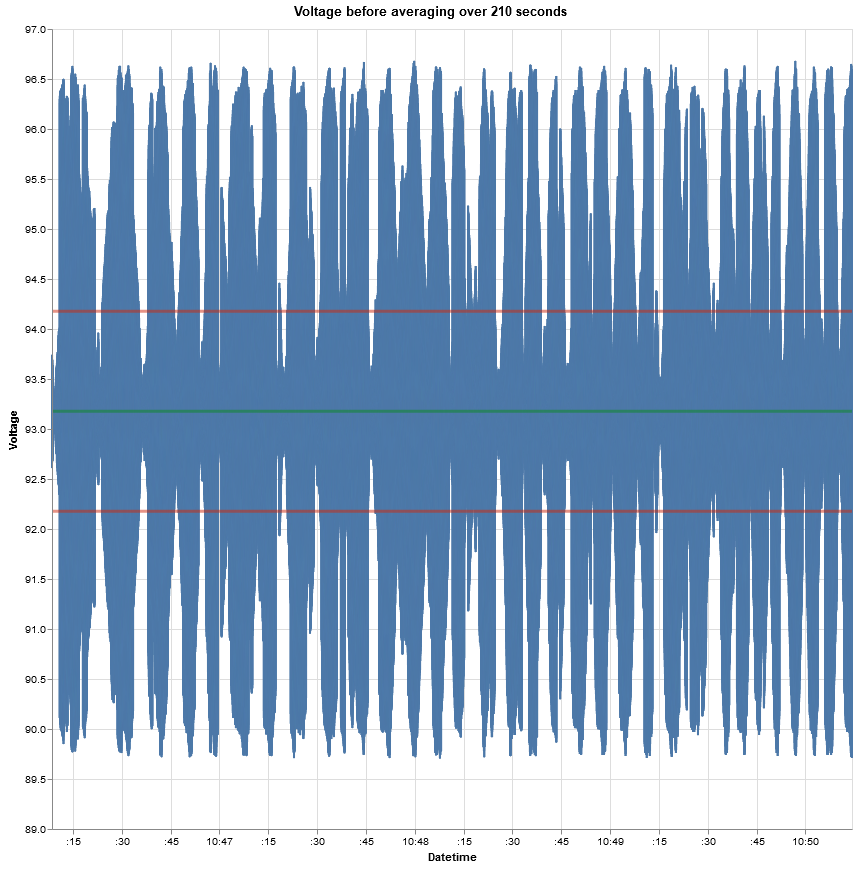

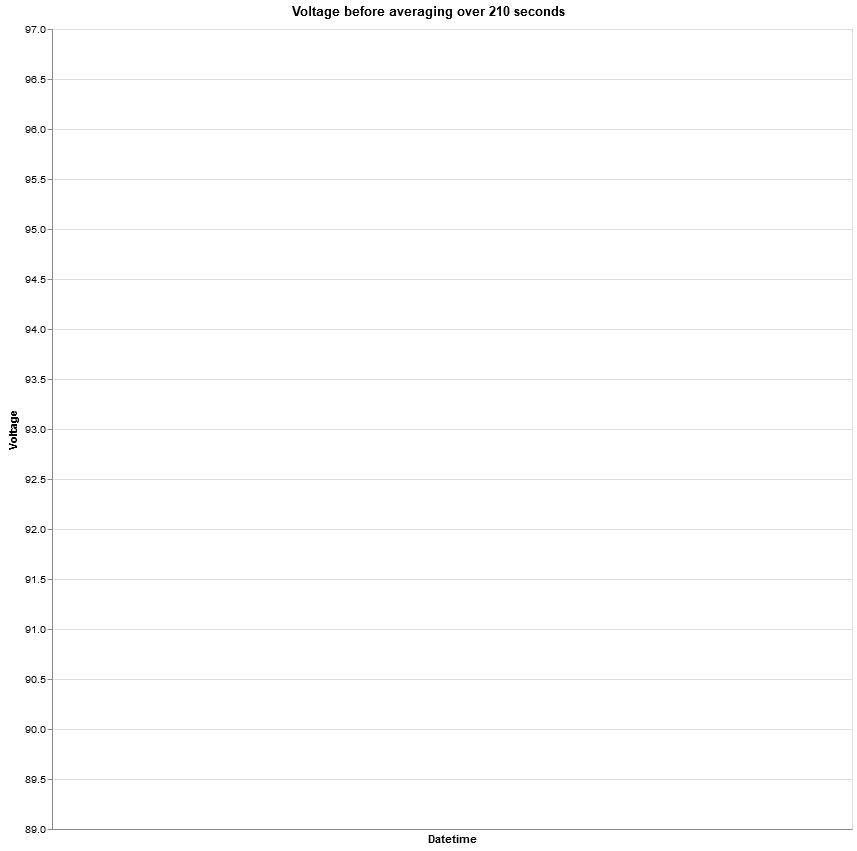

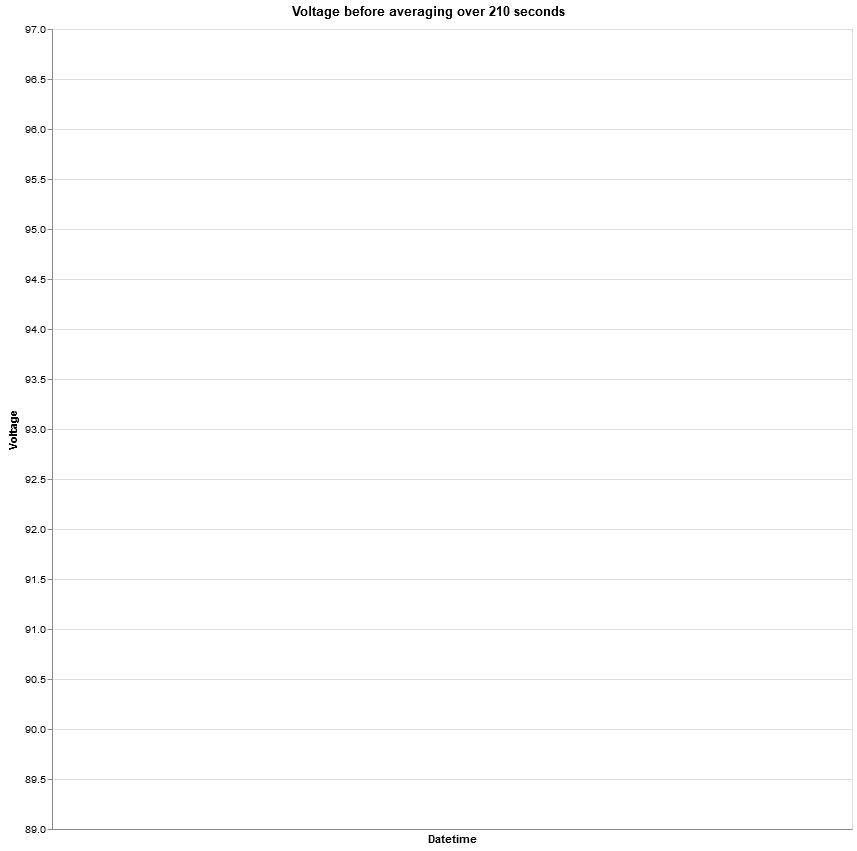

In [6]:
# Graph the line
base_line = alt.Chart().mark_line().encode(
    alt.X("Datetime:T", title="Datetime"),
    alt.Y("Value:Q", scale = alt.Scale(domain=[89, 97]), title="Voltage")
).properties(
    height = 800,
    width=800
)

alt.layer(base_line, limits_layer, data=flatten_raw_data, title="Voltage before averaging over 210 seconds", config={"background": "white"})

In [7]:
raw_mean = np.mean(flatten_raw_data)
raw_mean

Value    93.176931
dtype: float64

In [8]:
raw_std = np.std(flatten_raw_data)
raw_std

Value    2.394288
dtype: float64

The graph above shows how often the signal is outside of the stability parameters set at $\pm1kV$ from the mean. We also see that the signal has a standard deviation of $2.394288kV$ from a mean of $93.176931kV$.

In [9]:
raw_unstable_seconds = unstable_seconds(flatten_raw_data, float(raw_mean))
raw_unstable_seconds

161.87

The number of unstable seconds is 161.87 over this 210 second window.

### Averaging the data

Now we will average the data by averaging values which are 180 degrees apart on the 50Hz wave. As this data was collected while sampling 100 elements at 100Hz (new reading every second) we need to average each pair of elements. We set the timestamp of the average to the later element's timestamp.

In [10]:
averaged_data = average_data(flatten_raw_data)

In [11]:
averaged_data_mean = np.mean(averaged_data)
averaged_data_mean

Value    93.177028
dtype: float64

In [12]:
np.std(averaged_data)

Value    0.152311
dtype: float64

In [13]:
1- np.std(averaged_data)/np.std(flatten_raw_data)

Value    0.936386
dtype: float64

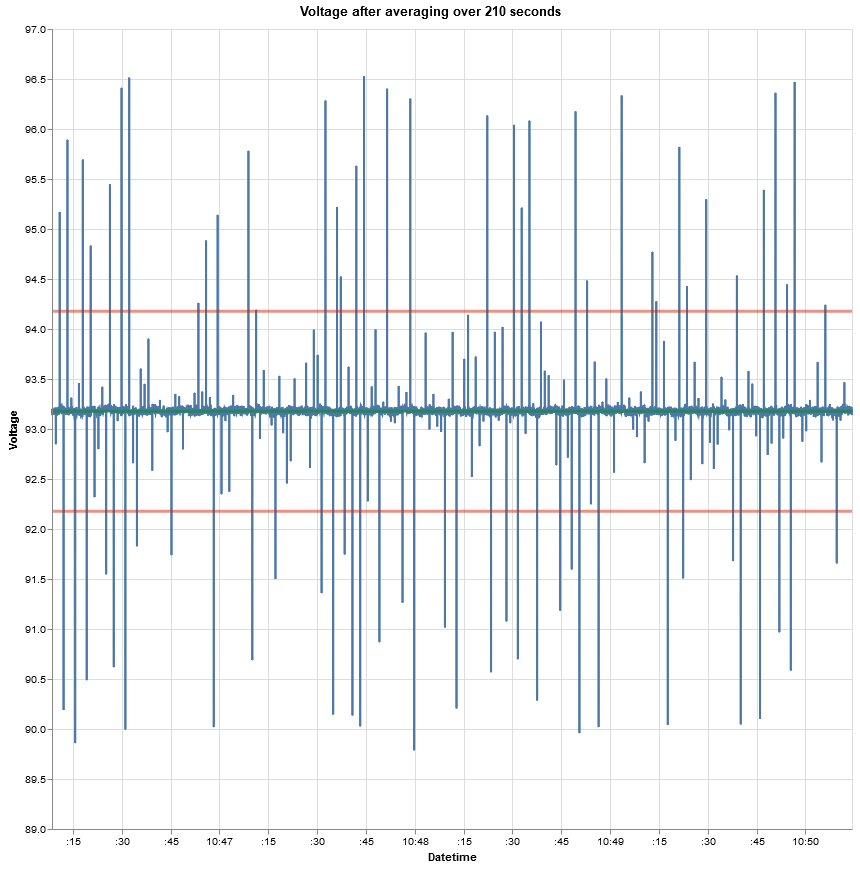

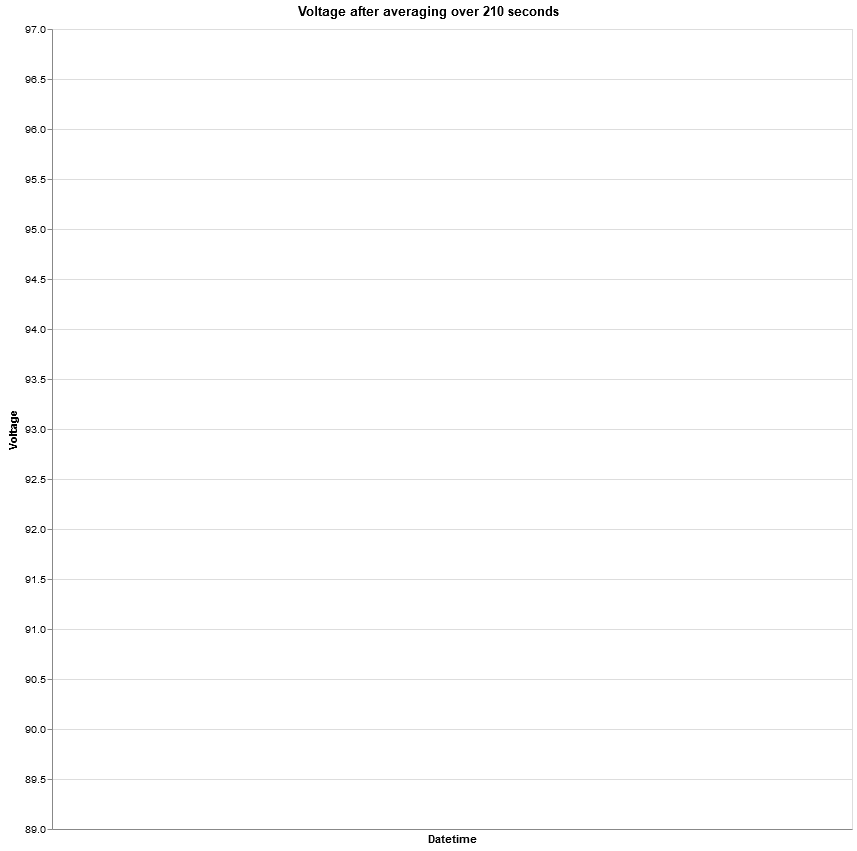

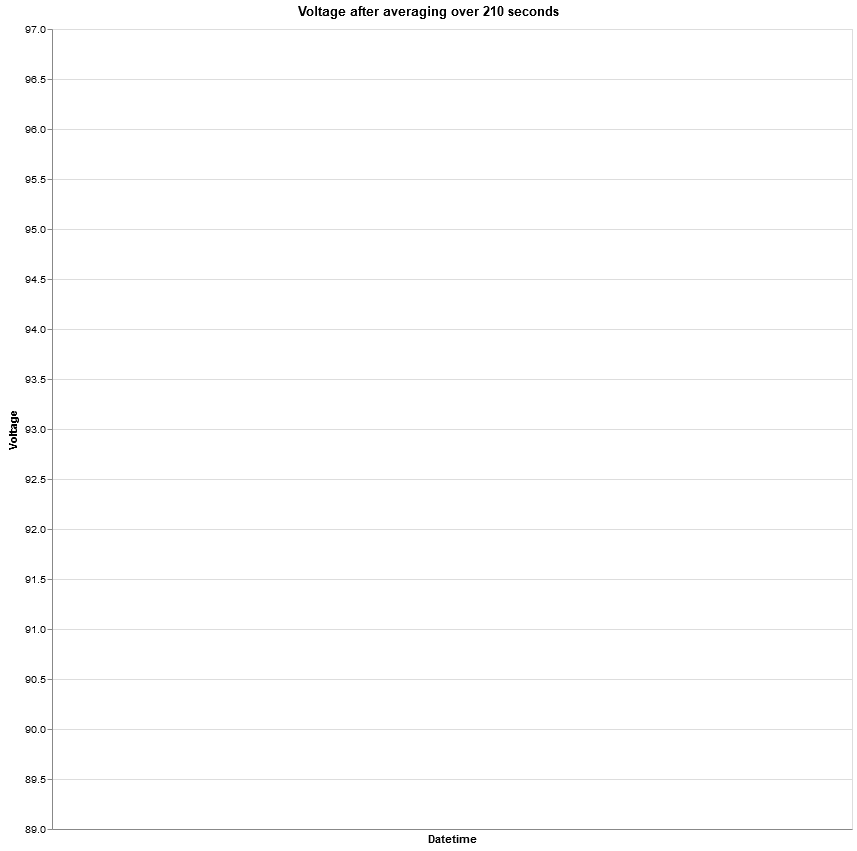

In [14]:
averaged_limits = pd.DataFrame([{
    'average': np.mean(averaged_data.loc[:, "Value"]),
    'low_limit': np.mean(averaged_data.loc[:, "Value"]) - 1,
    'high_limit': np.mean(averaged_data.loc[:, "Value"]) + 1
}])
averaged_limits_layer = alt.layer( mean, high_limit, low_limit, data=averaged_limits)

alt.layer(base_line,averaged_limits_layer, data=averaged_data, title="Voltage after averaging over 210 seconds", config={"background": "white"})

The graph above shows how often the signal is outside of the stability parameters set at $\pm1kV$ from the mean. We also see that the signal has a standard deviation of $0.152311kV$ from a mean of $93.177028kV$. This is a $93.6386\%$ reduction of the standard deviation.

In [15]:
averaged_unstable_second = unstable_seconds(averaged_data, float(averaged_data_mean))
averaged_unstable_second

0.74

In [16]:
1 - averaged_unstable_second/raw_unstable_seconds

0.995428430221783

The number of unstable seconds is 0.74 seconds over this 210 second window- a 99.54% decrease in the amount of time spent unstable.

## Analysis of 10 minutes of data

### Raw data Analysis

First we load the data and calibrated the data to the separator PSU voltage.

In [17]:
data = pd.read_csv("C:\\Users\\olz75487\\Documents\\muonfe\\data\\processed\\2018-11-09-voltage-data-cleaned.csv", 
                   nrows=600)
calibrated_data = calibrate_data(data, 20)
calibrated_data = calibrated_data.sort_index(axis=1)

In [18]:
calibrated_data = calibrate_data(data, 20)

Now we flatten each array of data by asigning a time stamp to each element of the array in the following way:

- Given a row,  finding the time delta between this row and the next row,
- Dividing this time delta by the number of elements in an array (100 in this case) to get the time delta between readings.
- For each element of the array, multiple the time delta between readings and the position of the element in the array and add this to the time reading for the row.

Note this assumes that readings are sampled equally spaced apart.

In [19]:
flatten_raw_data = flatten_data(calibrated_data)

In [20]:
# These charts create rules to show the mean and stability limits.
raw_limits = pd.DataFrame([{
    'average': np.mean(flatten_raw_data.loc[:, "Value"]),
    'low_limit': np.mean(flatten_raw_data.loc[:, "Value"]) - 1,
    'high_limit': np.mean(flatten_raw_data.loc[:, "Value"]) + 1
}])

mean = alt.Chart(raw_limits).mark_rule(color='#09881F', opacity=0.5).encode(
    y = "average:Q",
    size=alt.value(3)
)

low_limit = alt.Chart(raw_limits).mark_rule(color='#CE270B', opacity=0.5).encode(
    y = "low_limit:Q",
    size=alt.value(3)
)

high_limit = alt.Chart(raw_limits).mark_rule(color='#CE270B', opacity=0.5).encode(
    y = "high_limit:Q",
    size=alt.value(3)
)

limits_layer = alt.layer( mean, high_limit, low_limit, data=raw_limits)

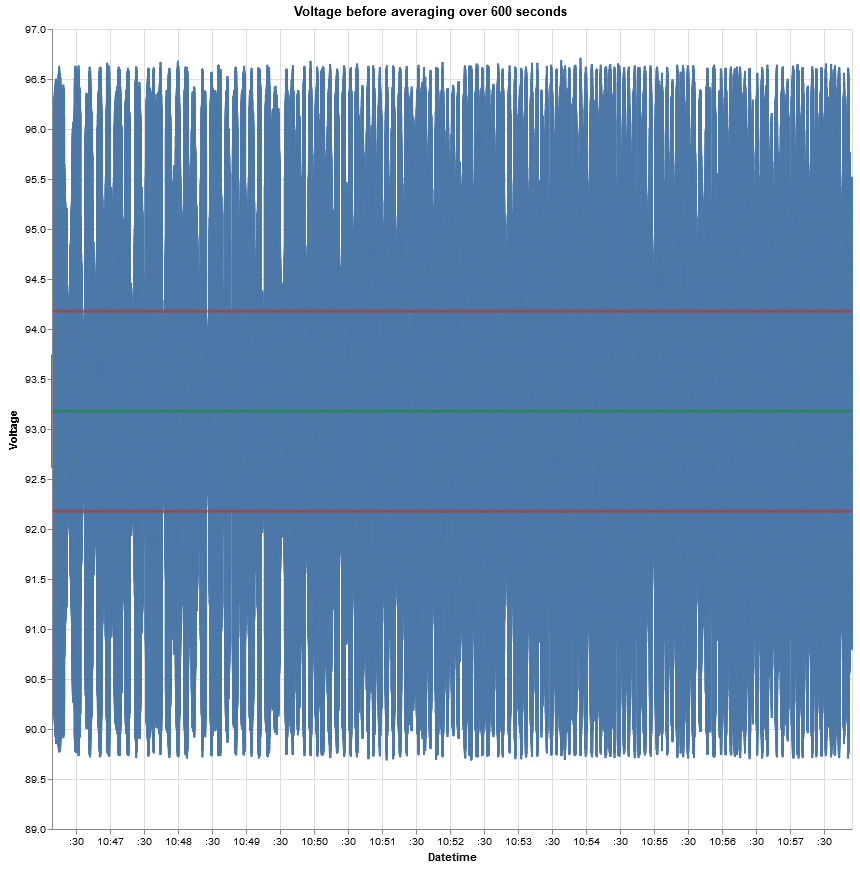

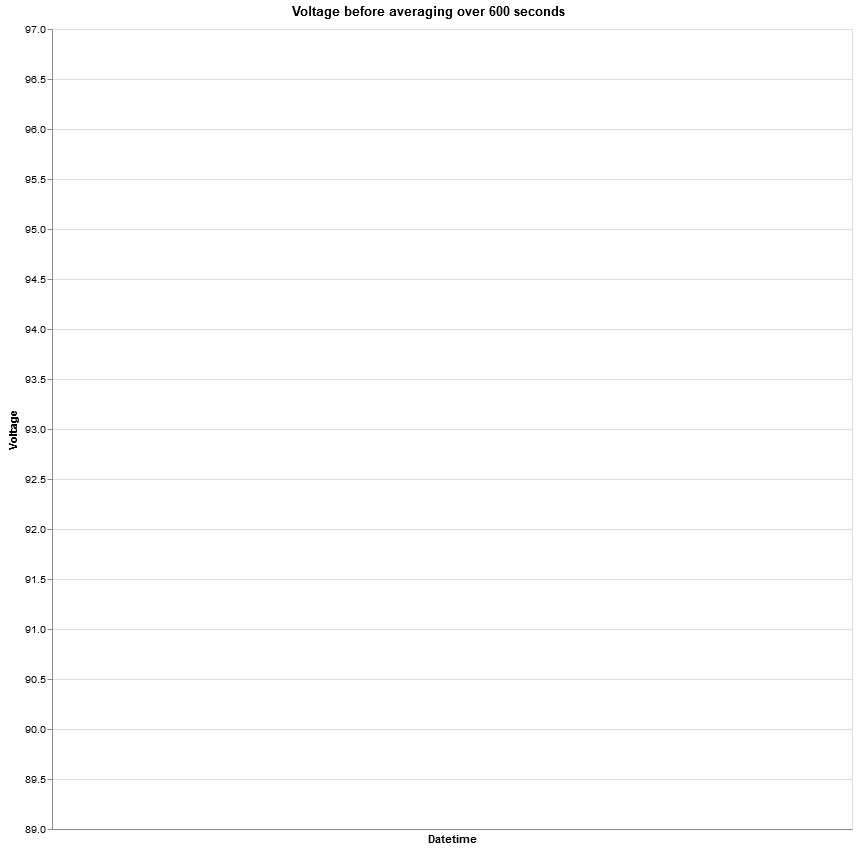

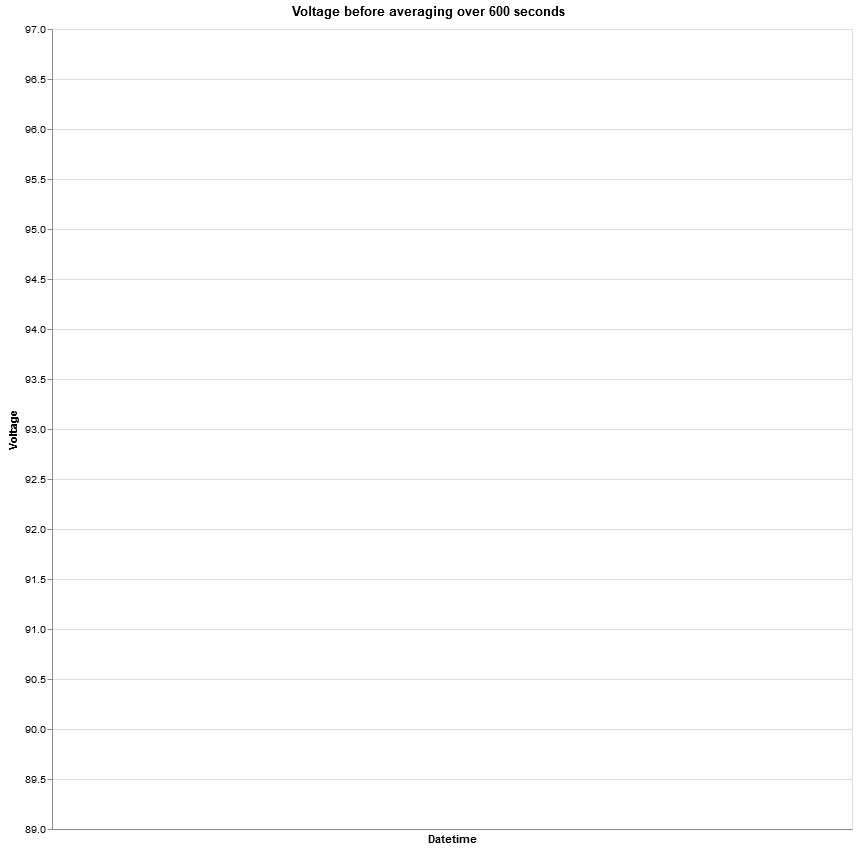

In [21]:
# Graph the line
base_line = alt.Chart().mark_line().encode(
    alt.X("Datetime:T", title="Datetime"),
    alt.Y("Value:Q", scale = alt.Scale(domain=[89, 97]), title="Voltage")
).properties(
    height = 800,
    width=800
)

raw_line = base_line.properties(title = "Voltage before averaging")

alt.layer(base_line, limits_layer, data=flatten_raw_data, title="Voltage before averaging over 600 seconds", config={"background": "white"} )

In [22]:
raw_mean = np.mean(flatten_raw_data)
raw_mean

Value    93.177092
dtype: float64

In [23]:
raw_std = np.std(flatten_raw_data)
raw_std

Value    2.383439
dtype: float64

The graph above shows how often the signal is outside of the stability parameters set at $\pm1kV$ from the mean. We also see that the signal has a standard deviation of $2.383439kV$ from a mean of $93.177092kV$.

In [24]:
raw_unstable_seconds = unstable_seconds(flatten_raw_data, float(raw_mean))
raw_unstable_seconds

480.55

The number of unstable seconds is 480.55 over this 10 minute windows. This would suggest that the signal is permanently unstable.

## Averaging the data

Now we will average the data by averaging values which are 180 degrees apart on the 50Hz wave. As this data was collected while sampling 100 elements at 100Hz (new reading every second) we need to average each pair of elements. We set the timestamp of the average to the later element's timestamp.

In [25]:
averaged_data = average_data(flatten_raw_data)

In [26]:
averaged_data_mean = np.mean(averaged_data)
averaged_data_mean

Value    93.177117
dtype: float64

In [27]:
np.std(averaged_data)

Value    0.151717
dtype: float64

In [28]:
1- np.std(averaged_data)/np.std(flatten_raw_data)

Value    0.936345
dtype: float64

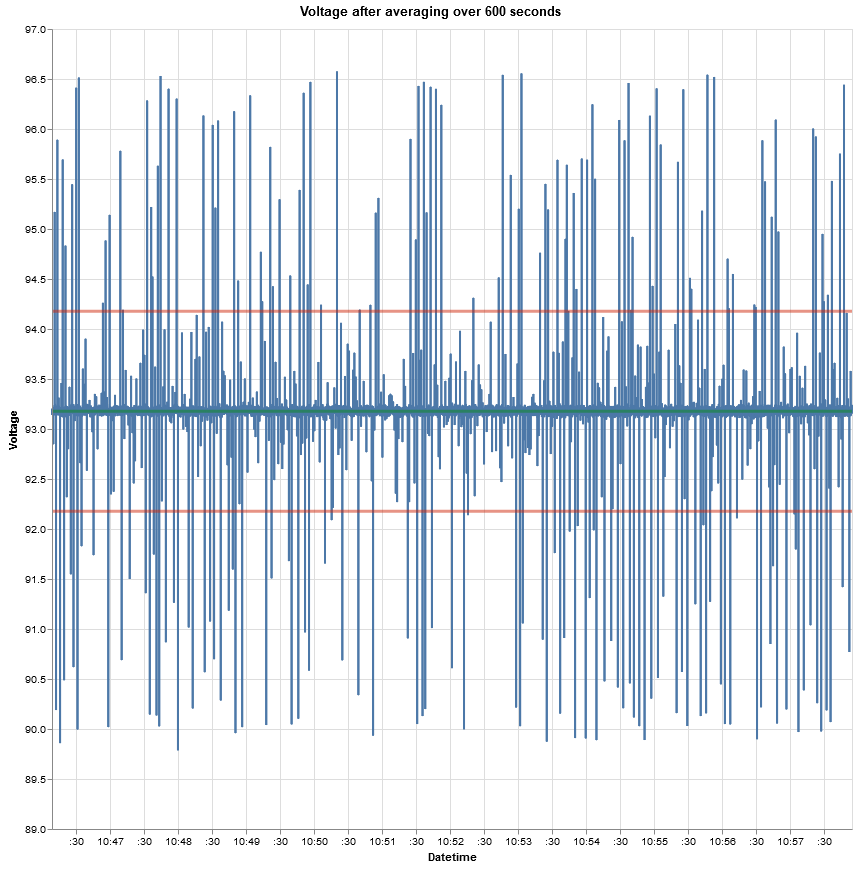

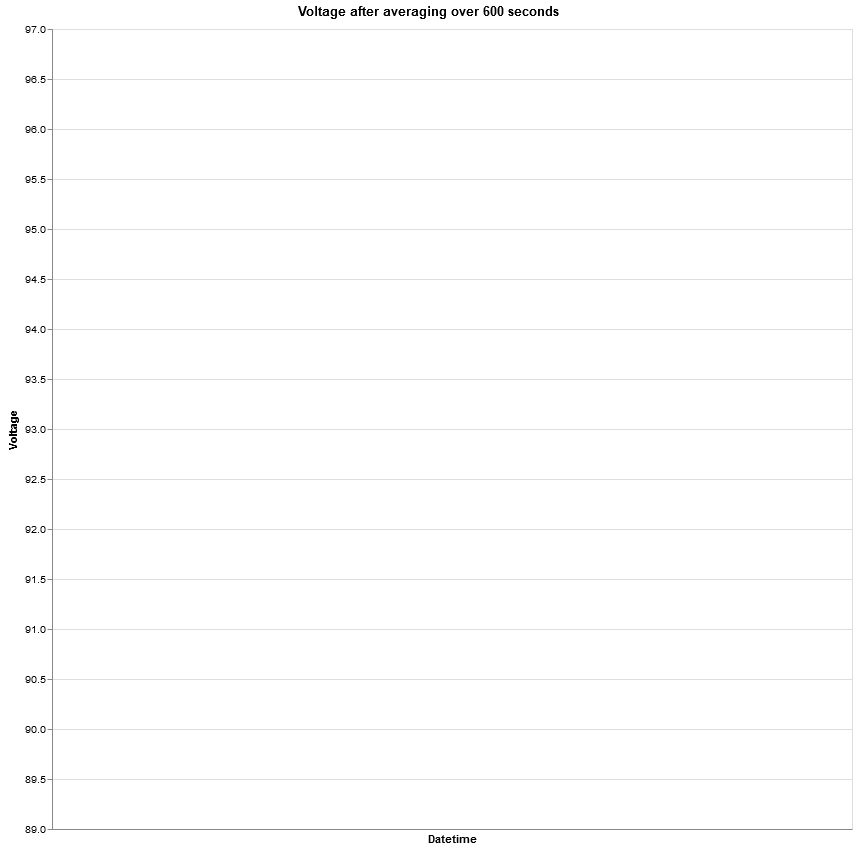

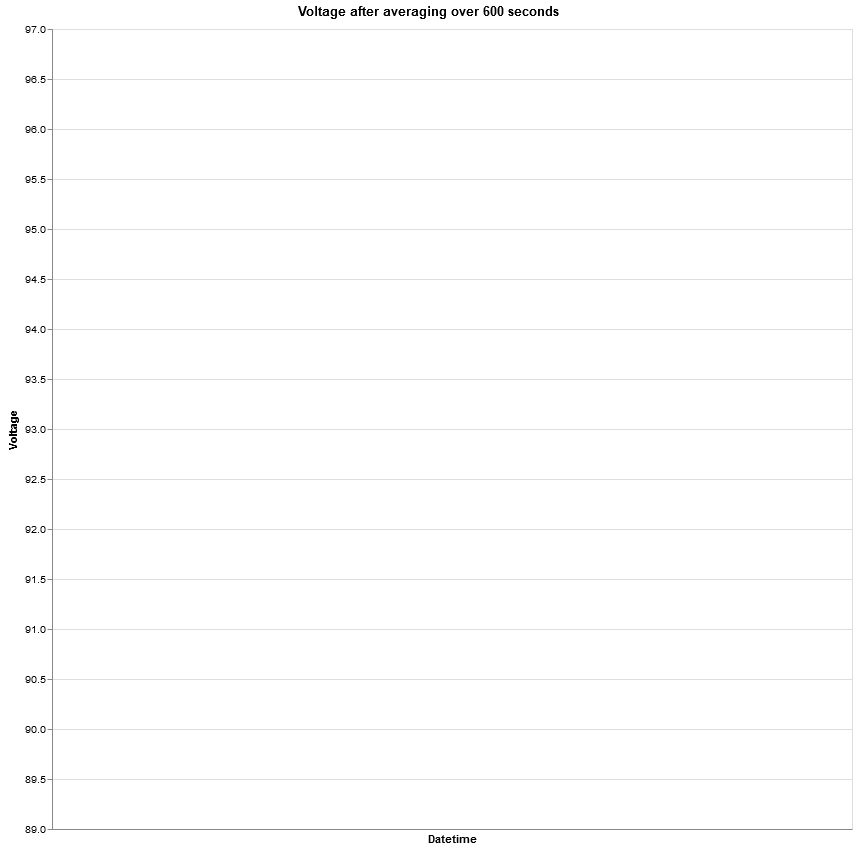

In [29]:
averaged_limits = pd.DataFrame([{
    'average': np.mean(averaged_data.loc[:, "Value"]),
    'low_limit': np.mean(averaged_data.loc[:, "Value"]) - 1,
    'high_limit': np.mean(averaged_data.loc[:, "Value"]) + 1
}])
averaged_limits_layer = alt.layer( mean, high_limit, low_limit, data=averaged_limits)

alt.layer(base_line,averaged_limits_layer, data=averaged_data, title="Voltage after averaging over 600 seconds", config={"background": "white"})

The graph above shows how often the signal is outside of the stability parameters set at $\pm1kV$ from the mean. We also see that the signal has a standard deviation of $0.151717kV$ from a mean of $93.17711652034315kV$. This is a $93.6345\%$ reduction of the standard deviation.

In [30]:
averaged_unstable_second = unstable_seconds(averaged_data, float(averaged_data_mean))
averaged_unstable_second

2.07

In [31]:
1 - averaged_unstable_second/raw_unstable_seconds

0.9956924357507023

The number of unstable seconds is 2.07 seconds over this 10 minute windows - a 99.57% decrease in the amount of time spent unstable. This falls with in the error bounds that are specified in the requirements document.